In [93]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

In [104]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [105]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [106]:
pd.isnull(df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [107]:
cors = df.corr(method="pearson")

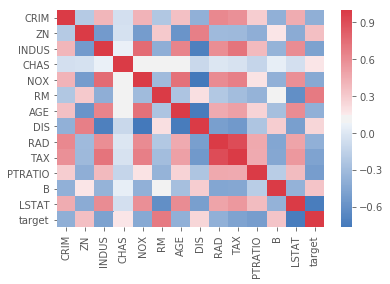

In [108]:
sns.heatmap(cors, cmap=sns.diverging_palette(250, 10, n=3, as_cmap=True))

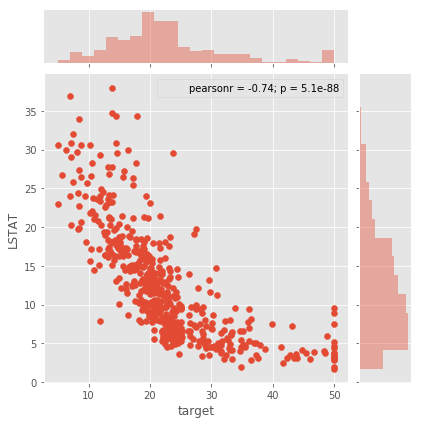

In [109]:
sns.jointplot(df['target'], df['LSTAT'], kind='scatter')

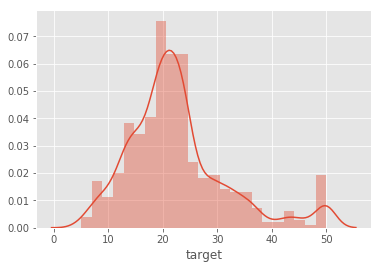

In [110]:
sns.distplot(df['target'])

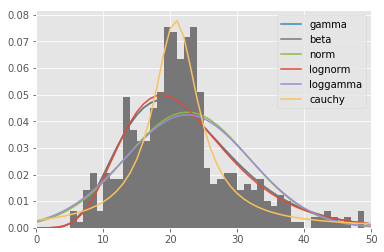

In [118]:
distros = ['gamma', 'beta', 'norm', 'lognorm', 'loggamma', 'cauchy']

for d in distros:
    dist = getattr(scipy.stats, d)
    size = 506
    x = scipy.arange(size)
    h = plt.hist(df['target'], bins=range(50), normed=True)
    param = dist.fit(df['target'])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=d)
    plt.xlim(0,50)
plt.legend(loc='upper right')